<a href="https://colab.research.google.com/github/AbhiRajBajpai/EDA-Daily-Transactions/blob/main/Project1_Daily_Transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Import necessary libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the visual style for the plots for a cleaner look
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (14, 7)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


In [11]:
# Load your dataset from the uploaded file
try:
    df = pd.read_csv('Daily Household Transactions.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    print("❌ Error: 'Daily Household Transactions.csv' not found. Please make sure you have uploaded it to Colab.")

✅ Dataset loaded successfully!


In [12]:
# Display the first 5 rows of the dataset
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Currency
0,20/09/2018 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,INR
1,20/09/2018 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,INR
2,19/09/2018,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,INR
3,17/09/2018 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,INR
4,16/09/2018 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,INR


In [13]:
# Get the number of rows and columns
df.shape

(2461, 8)

In [14]:
# Count the number of missing values in each column
df.isnull().sum()

,0
Date,0
Mode,0
Category,0
Subcategory,635
Note,521
Amount,0
Income/Expense,0
Currency,0


In [15]:
# The .info() output showed the 'Date' column is an 'object' type. We need to convert it.
print("Converting 'Date' column to datetime format...")
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
print("✅ 'Date' column converted.")

# 'Subcategory' and 'Note' have missing values. We'll fill them with a placeholder.
df['Subcategory'].fillna('None', inplace=True)
df['Note'].fillna('No Note', inplace=True)
print("✅ Missing values in 'Subcategory' and 'Note' filled.")

# The 'Currency' column is redundant, so we drop it.
df.drop('Currency', axis=1, inplace=True)
print("✅ 'Currency' column dropped.")

# Check for and remove any duplicate rows
duplicates_count = df.duplicated().sum()
if duplicates_count > 0:
    df.drop_duplicates(inplace=True)
    print(f"✅ {duplicates_count} duplicate rows removed.")
else:
    print("✅ No duplicate rows found.")

Converting 'Date' column to datetime format...
✅ 'Date' column converted.
✅ Missing values in 'Subcategory' and 'Note' filled.
✅ 'Currency' column dropped.
✅ 404 duplicate rows removed.


/tmp/ipython-input-1769559730.py:3: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
/tmp/ipython-input-1769559730.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Subcategory'].fillna('None', inplace=True)
/tmp/ipython-input-1769559730.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignme

In [16]:
# Display the data info again to see the changes after cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2057 entries, 0 to 2460
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            1303 non-null   datetime64[ns]
 1   Mode            2057 non-null   object        
 2   Category        2057 non-null   object        
 3   Subcategory     2057 non-null   object        
 4   Note            2057 non-null   object        
 5   Amount          2057 non-null   float64       
 6   Income/Expense  2057 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 128.6+ KB


/tmp/ipython-input-1131319296.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Income/Expense', palette='viridis', order=df['Income/Expense'].value_counts().index)


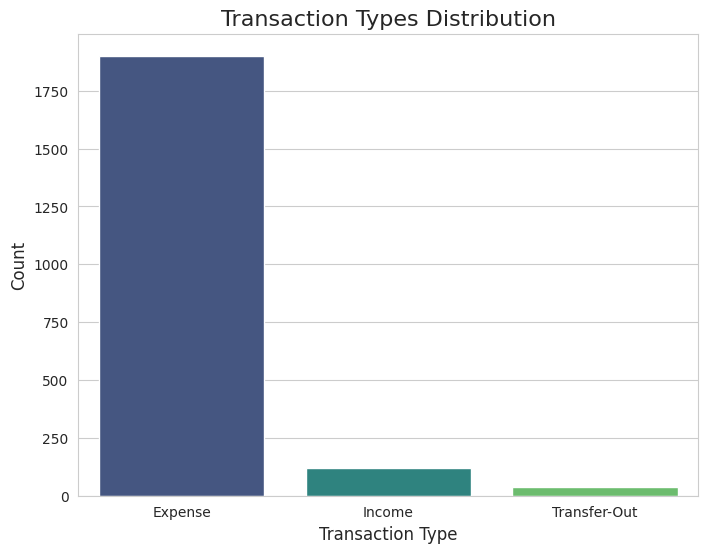

In [17]:
# Plot the distribution of transaction types
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Income/Expense', palette='viridis', order=df['Income/Expense'].value_counts().index)
plt.title('Transaction Types Distribution', fontsize=16)
plt.xlabel('Transaction Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

/tmp/ipython-input-3509051496.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Mode', palette='plasma', order=df['Mode'].value_counts().nlargest(10).index)


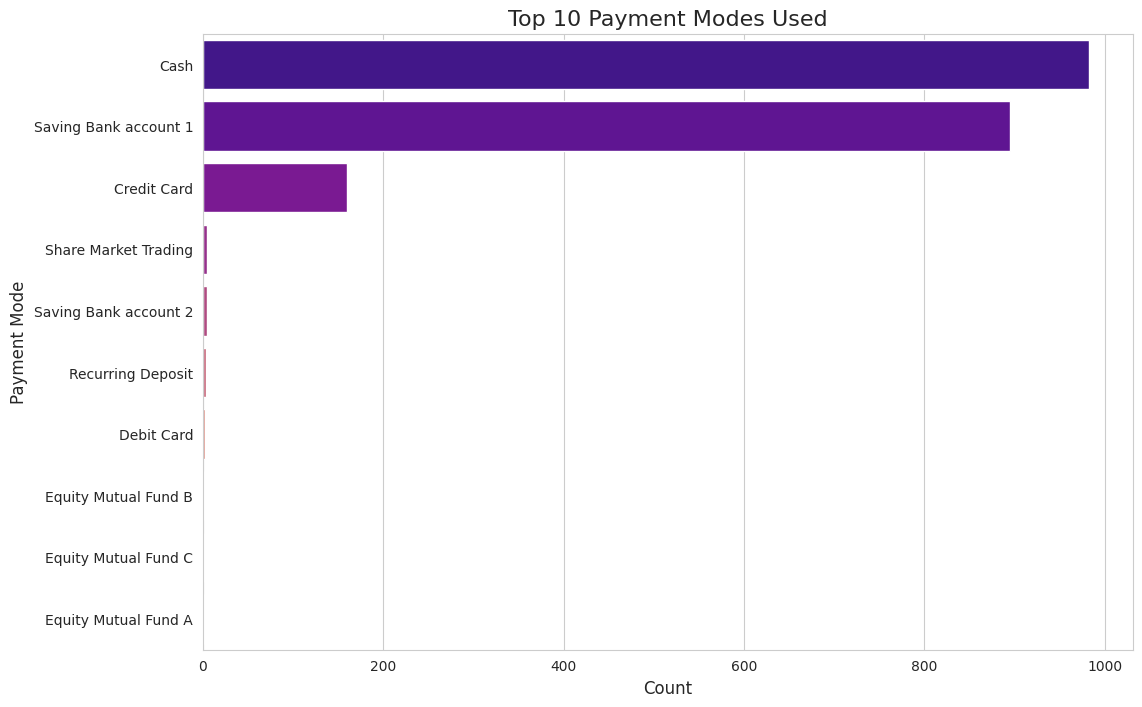

In [18]:
# Plot the top 10 most used payment modes
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Mode', palette='plasma', order=df['Mode'].value_counts().nlargest(10).index)
plt.title('Top 10 Payment Modes Used', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Payment Mode', fontsize=12)
plt.show()

/tmp/ipython-input-3114276703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='Category', palette='magma', order=df['Category'].value_counts().nlargest(10).index)


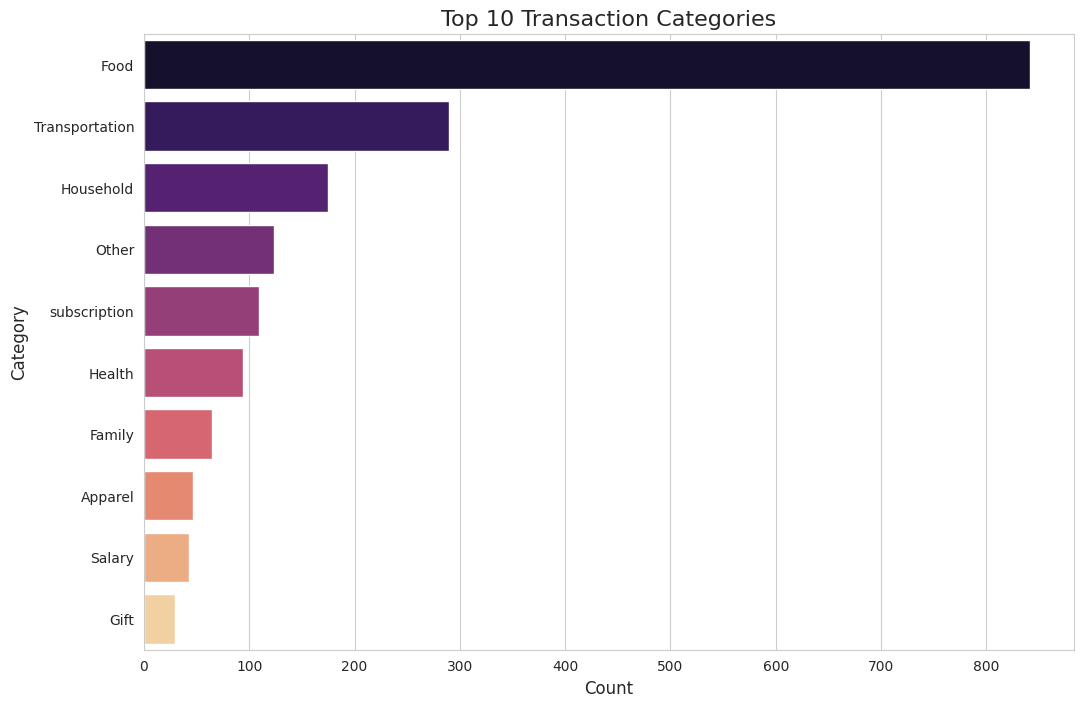

In [19]:
# Plot the top 10 transaction categories
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='Category', palette='magma', order=df['Category'].value_counts().nlargest(10).index)
plt.title('Top 10 Transaction Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

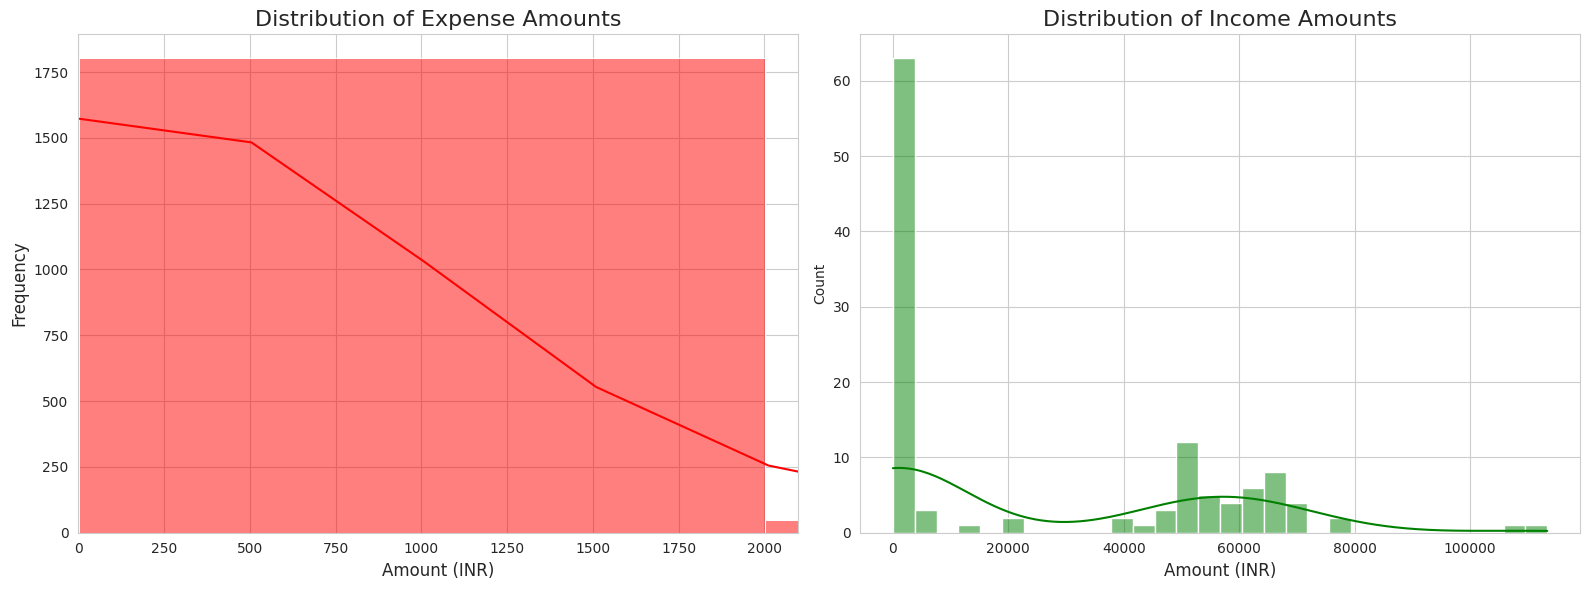

In [20]:
# Separate the data into expenses and income for clearer analysis
expenses_df = df[df['Income/Expense'] == 'Expense']
income_df = df[df['Income/Expense'] == 'Income']

# Create side-by-side plots for the distribution of amounts
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1) # First plot
sns.histplot(expenses_df['Amount'], bins=50, kde=True, color='red')
plt.title('Distribution of Expense Amounts', fontsize=16)
plt.xlabel('Amount (INR)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, expenses_df['Amount'].quantile(0.95)) # Limit view to 95% of data to exclude extreme outliers

plt.subplot(1, 2, 2) # Second plot
sns.histplot(income_df['Amount'], bins=30, kde=True, color='green')
plt.title('Distribution of Income Amounts', fontsize=16)
plt.xlabel('Amount (INR)', fontsize=12)
plt.tight_layout()
plt.show()

/tmp/ipython-input-549472328.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_10_expenses.index, x=top_10_expenses.values, palette='rocket')


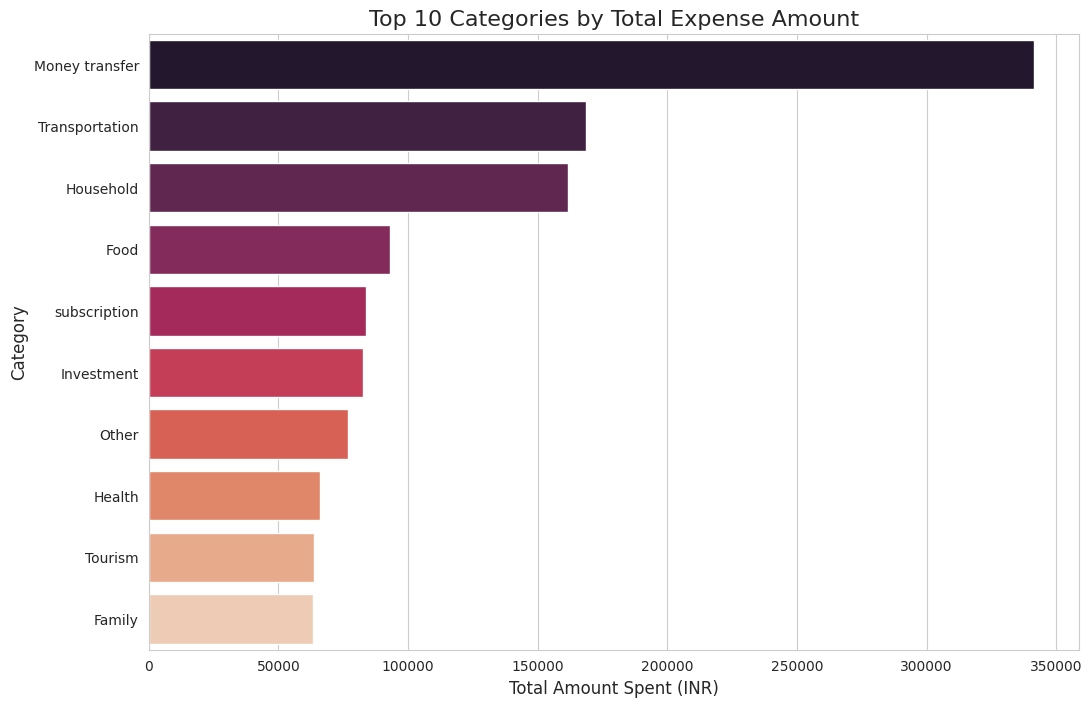

In [21]:
# Calculate and plot the top 10 categories by total expense amount
top_10_expenses = expenses_df.groupby('Category')['Amount'].sum().nlargest(10)

plt.figure(figsize=(12, 8))
sns.barplot(y=top_10_expenses.index, x=top_10_expenses.values, palette='rocket')
plt.title('Top 10 Categories by Total Expense Amount', fontsize=16)
plt.xlabel('Total Amount Spent (INR)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.show()

/tmp/ipython-input-1998574497.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_expenses_df, x='Amount', y='Category', palette='coolwarm')


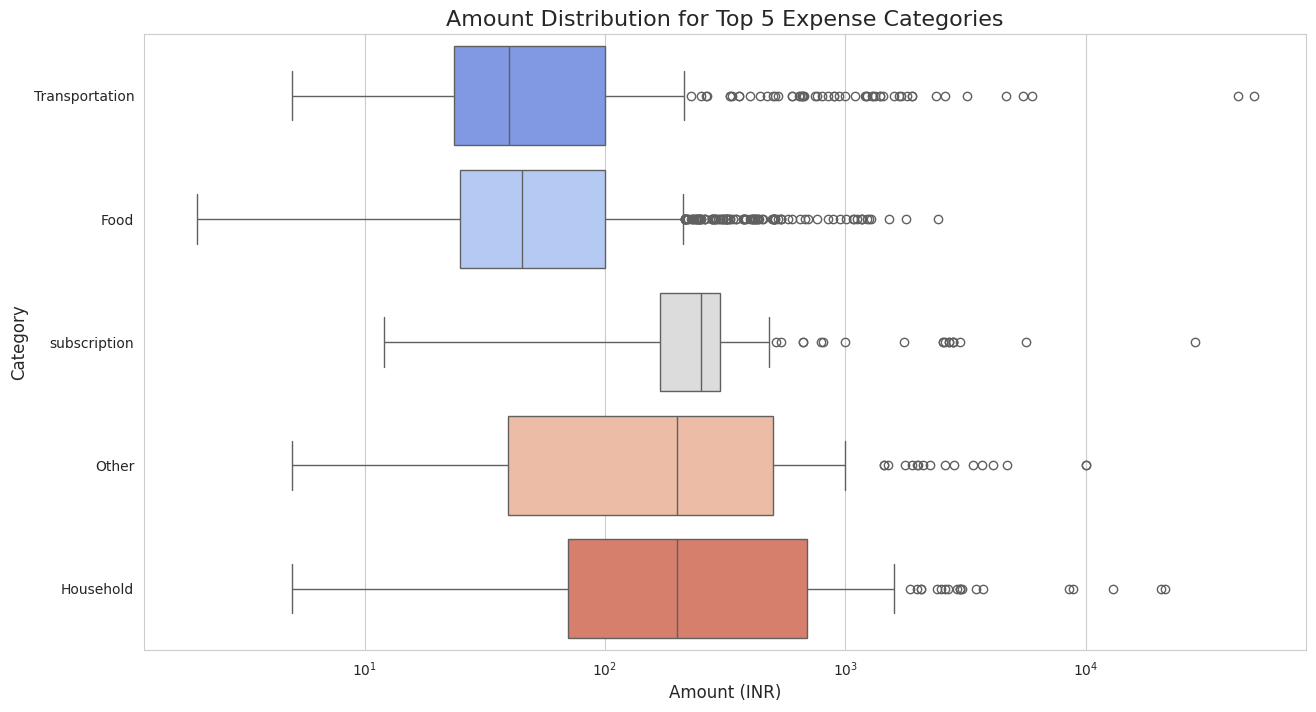

In [22]:
# Filter for the top 5 most frequent expense categories
top_5_expense_categories = expenses_df['Category'].value_counts().nlargest(5).index
filtered_expenses_df = expenses_df[expenses_df['Category'].isin(top_5_expense_categories)]

# Create a boxplot to see the distribution of amounts
plt.figure(figsize=(15, 8))
sns.boxplot(data=filtered_expenses_df, x='Amount', y='Category', palette='coolwarm')
plt.title('Amount Distribution for Top 5 Expense Categories', fontsize=16)
plt.xlabel('Amount (INR)', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.xscale('log') # Use a log scale to better visualize wide-ranging amounts
plt.show()

In [23]:
# Extract time-based features from the 'Date' column
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()
df['Day_of_Week'] = df['Date'].dt.day_name()

# Display the first 5 rows to see the new columns
df.head()

,Date,Mode,Category,Subcategory,Note,Amount,Income/Expense,Year,Month,Day_of_Week
0,2018-09-20 12:04:08,Cash,Transportation,Train,2 Place 5 to Place 0,30.0,Expense,2018.0,September,Thursday
1,2018-09-20 12:03:15,Cash,Food,snacks,Idli medu Vada mix 2 plates,60.0,Expense,2018.0,September,Thursday
2,NaT,Saving Bank account 1,subscription,Netflix,1 month subscription,199.0,Expense,NaN,NaN,NaN
3,2018-09-17 23:41:17,Saving Bank account 1,subscription,Mobile Service Provider,Data booster pack,19.0,Expense,2018.0,September,Monday
4,2018-09-16 17:15:08,Cash,Festivals,Ganesh Pujan,Ganesh idol,251.0,Expense,2018.0,September,Sunday


Columns after reset_index:
Index(['Year', 'Date', 'Month', 'Expense', 'Income', 'Transfer-Out'], dtype='object', name='Income/Expense')


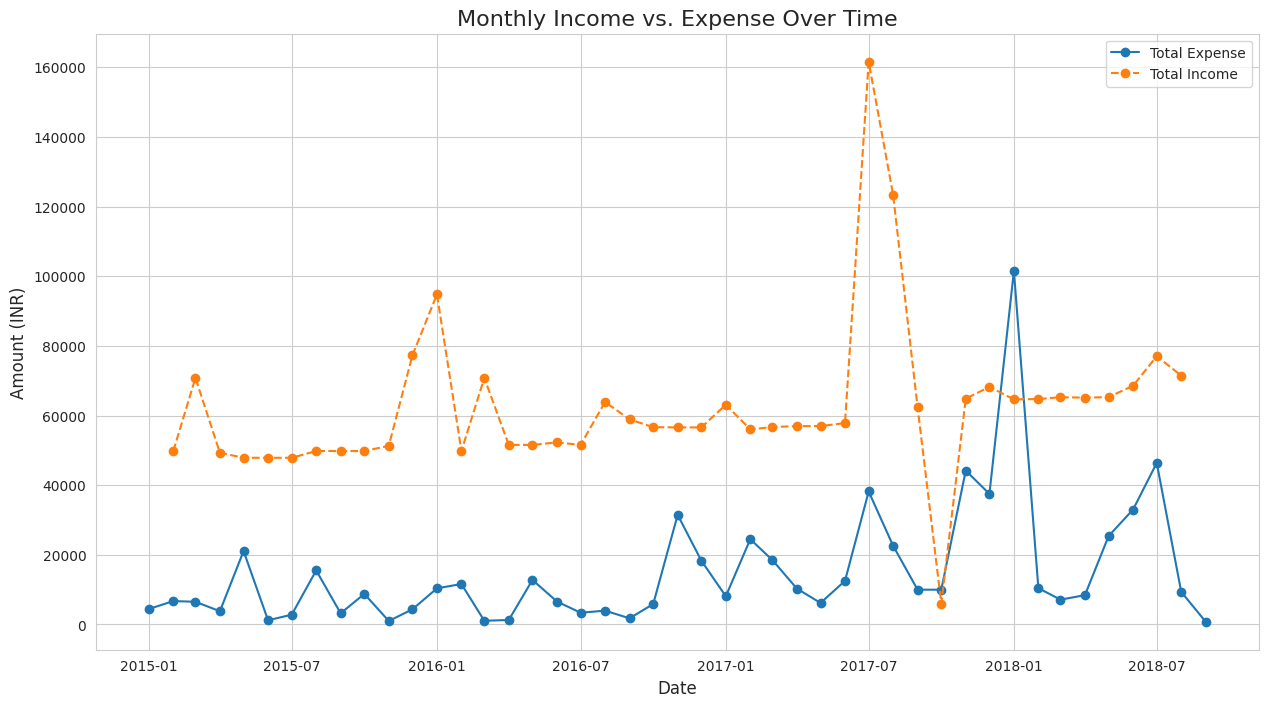

In [27]:
# Group data by month and transaction type to calculate sums
monthly_analysis = df.groupby(['Year', df['Date'].dt.month, 'Month', 'Income/Expense'])['Amount'].sum().unstack()
monthly_analysis.reset_index(inplace=True)

# Debugging: Print columns after reset_index
print("Columns after reset_index:")
print(monthly_analysis.columns)

# Use the 'Date' column (which contains the month number) and format it correctly
monthly_analysis['Date'] = pd.to_datetime(monthly_analysis['Year'].astype(int).astype(str) + '-' + monthly_analysis['Date'].astype(int).astype(str).str.zfill(2) + '-01')

# Plot the monthly income vs. expense trend
plt.figure(figsize=(15, 8))
plt.plot(monthly_analysis['Date'], monthly_analysis.get('Expense', 0), marker='o', linestyle='-', label='Total Expense')
plt.plot(monthly_analysis['Date'], monthly_analysis.get('Income', 0), marker='o', linestyle='--', label='Total Income')
plt.title('Monthly Income vs. Expense Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount (INR)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-4066552482.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=spending_by_day.index, y=spending_by_day.values, palette='winter')


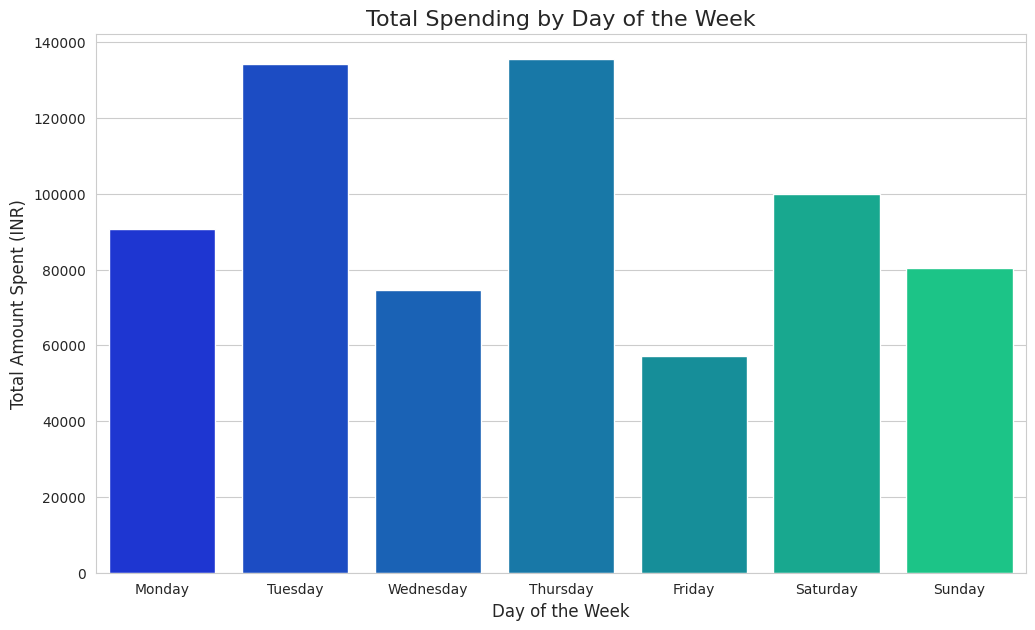


🎉 --- Exploratory Data Analysis Complete! --- 🎉


In [30]:
# Calculate and plot total spending for each day of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Regenerate expenses_df to ensure 'Date' column is available and create Day_of_Week column
expenses_df = df[df['Income/Expense'] == 'Expense'].copy()
expenses_df['Day_of_Week'] = expenses_df['Date'].dt.day_name()


spending_by_day = expenses_df.groupby('Day_of_Week')['Amount'].sum().reindex(day_order)

plt.figure(figsize=(12, 7))
sns.barplot(x=spending_by_day.index, y=spending_by_day.values, palette='winter')
plt.title('Total Spending by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Total Amount Spent (INR)', fontsize=12)
plt.show()

print("\n🎉 --- Exploratory Data Analysis Complete! --- 🎉")